In [26]:
import pandas
print (pandas.__version__)

2.2.2


In [28]:
pip list

Package                           Version
--------------------------------- ------------------
absl-py                           2.2.2
aext-assistant                    4.0.15
aext-assistant-server             4.0.15
aext-core                         4.0.15
aext-core-server                  4.0.15
aext-panels                       4.0.15
aext-panels-server                4.0.15
aext-share-notebook               4.0.15
aext-share-notebook-server        4.0.15
aext-shared                       4.0.15
aiobotocore                       2.12.3
aiohttp                           3.9.5
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.16
altair                            5.0.1
anaconda-anon-usage               0.4.4
anaconda-catalogs                 0.2.0
anaconda-client                   1.12.3
anaconda-cloud-auth               0.5.1
anaconda-navigator                2.6.0
anaconda-project                  0.11.1
annotated-ty

In [29]:
import pandas as pd 
data = "AnemiaTipos.csv"

dataset = pd.read_csv(data)

dataset

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
0,10.00,43.200,50.100,4.30000,5.00000,2.77,7.3,24.2000,87.7,26.3,30.1,189.0,12.500000,0.17000,Normocytic hypochromic anemia
1,10.00,42.400,52.300,4.20000,5.30000,2.84,7.3,25.0000,88.2,25.7,20.2,180.0,12.500000,0.16000,Normocytic hypochromic anemia
2,7.20,30.700,60.700,2.20000,4.40000,3.97,9.0,30.5000,77.0,22.6,29.5,148.0,14.300000,0.14000,Iron deficiency anemia
3,6.00,30.200,63.500,1.80000,3.80000,4.22,3.8,32.8000,77.9,23.2,29.8,143.0,11.300000,0.12000,Iron deficiency anemia
4,4.20,39.100,53.700,1.60000,2.30000,3.93,0.4,316.0000,80.6,23.9,29.7,236.0,12.800000,0.22000,Normocytic hypochromic anemia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145,4.40,25.845,77.511,1.88076,5.14094,4.86,13.5,46.1526,80.7,27.7,34.4,180.0,14.312512,0.26028,Healthy
1146,5.60,25.845,77.511,1.88076,5.14094,4.85,15.0,46.1526,91.7,31.0,33.8,215.0,14.312512,0.26028,Healthy
1147,9.20,25.845,77.511,1.88076,5.14094,4.47,13.1,46.1526,88.7,29.3,33.0,329.0,14.312512,0.26028,Healthy
1148,6.48,25.845,77.511,1.88076,5.14094,4.75,13.2,46.1526,86.7,27.9,32.1,174.0,14.312512,0.26028,Healthy


In [45]:
# Librerías para el desarrollo del proyecto
import matplotlib.pyplot as plt  # Librería para gráficas
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from matplotlib.ticker import StrMethodFormatter
import seaborn as sb

# Librerías pandas para el manejo de los datos
import pandas as pd
import pandas as pq
import pandas as pf
import pandas as filtro_filas

# Enlazando los datos en el archivo CSV
data = pd.read_csv("AnemiaTipos.csv", index_col=None)
import numpy as np
# Invocando a la librería
from lightgbm import LGBMClassifier  # salu2

In [47]:
#Verificamos cuantos tipos de enfermedades hay :V
print(data.groupby('Diagnosis').size())

Diagnosis
Healthy                           336
Iron deficiency anemia            189
Macrocytic anemia                  18
Normocytic hypochromic anemia     279
Normocytic normochromic anemia    269
Other microcytic anemia            59
dtype: int64


In [49]:
X = data[['WBC', 'LYMp', 'NEUTp', 'LYMn', 'NEUTn', 'RBC', 'HGB', 'HCT', 'MCV', 'MCH', 'MCHC', 'PLT', 'PDW', 'PCT']]

In [51]:
X.shape

(1150, 14)

In [53]:
Y = data['Diagnosis']
#ya = data_datos["CALIFICACION"] 
Y.shape

(1150,)

## CODIFICANDO "Y"

In [56]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_codificado = le.fit_transform(Y)

# Mostrar la codificación de cada clase
print("Codificación de clases:")
for i, clase in enumerate(le.classes_):
    print(f"{clase} -> {i}")

Codificación de clases:
Healthy -> 0
Iron deficiency anemia -> 1
Macrocytic anemia -> 2
Normocytic hypochromic anemia -> 3
Normocytic normochromic anemia -> 4
Other microcytic anemia -> 5


In [58]:
print(le.classes_)
##EN ESE ORDEN ESTAN PARA EL SISTEMA, DE AHI SACA 0 1 2 3 4 5 -->

['Healthy' 'Iron deficiency anemia' 'Macrocytic anemia'
 'Normocytic hypochromic anemia' 'Normocytic normochromic anemia'
 'Other microcytic anemia']


In [60]:
from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## PARTICIONAMIENTO DE LA DATA

In [63]:
from sklearn.model_selection import train_test_split

# Aquí usas X sin cambios y la Y codificada
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y_codificado, test_size=0.2, random_state=0)
print("---")
print(f"Entrenamiento: {X_trainset.shape[0]} muestras, {X_trainset.shape[1]} variables")
print(f"Etiquetas entrenamiento: {y_trainset.shape[0]} valores")
print(f"Prueba: {X_testset.shape[0]} muestras, {X_testset.shape[1]} variables")
print(f"Etiquetas prueba: {y_testset.shape[0]} valores")

---
Entrenamiento: 920 muestras, 14 variables
Etiquetas entrenamiento: 920 valores
Prueba: 230 muestras, 14 variables
Etiquetas prueba: 230 valores


## BALANCEANDO

In [66]:
from imblearn.combine import SMOTETomek
from collections  import Counter

print("Distribución antes del resampling:", Counter(y_trainset))

os_us = SMOTETomek(sampling_strategy='auto', random_state=0)
X_train_res, y_train_res = os_us.fit_resample(X_trainset, y_trainset)

print("Distribución tras aplicar SMOTE-Tomek", Counter(y_train_res))

Distribución antes del resampling: Counter({0: 272, 3: 225, 4: 208, 1: 151, 5: 49, 2: 15})
Distribución tras aplicar SMOTE-Tomek Counter({5: 271, 2: 271, 1: 266, 4: 262, 0: 260, 3: 256})


## MODELO STACKING

In [287]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report
from pytorch_tabnet.tab_model import TabNetClassifier
import numpy as np

# Convertir a numpy si es necesario
X_train_np = X_train_res.to_numpy() if hasattr(X_train_res, 'to_numpy') else X_train_res
X_test_np = X_testset.to_numpy() if hasattr(X_testset, 'to_numpy') else X_testset
y_train_np = np.array(y_train_res)
y_test_np = np.array(y_testset)

# Modelos base
modelo_dt = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=10, splitter='best', random_state=42)
modelo_rf = RandomForestClassifier(criterion='entropy', max_depth=6, max_features='log2', n_estimators=100, random_state=42)
model_cb = CatBoostClassifier(depth=7, iterations=200, l2_leaf_reg=3, learning_rate=0.1, verbose=0, random_state=42)
modelo_lgbm = LGBMClassifier(learning_rate=0.1, max_depth=5, n_estimators=100, num_leaves=31, random_state=42)
modelo_xgb_base = XGBClassifier(gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, use_label_encoder=False, eval_metric='logloss', random_state=42)

# Lista de modelos base
modelos_base = [
    ('dt', modelo_dt),
    ('rf', modelo_rf),
    ('cb', model_cb),
    ('lgbm', modelo_lgbm),
    ('xgb', modelo_xgb_base)
]

# Entrenar modelos base y recolectar predicciones en entrenamiento
meta_features_train = []
for name, model in modelos_base:
    model.fit(X_train_np, y_train_np)
    probs = model.predict_proba(X_train_np)
    meta_features_train.append(probs)

meta_X_train = np.hstack(meta_features_train)

# Recolectar predicciones en prueba
meta_features_test = []
for name, model in modelos_base:
    probs = model.predict_proba(X_test_np)
    meta_features_test.append(probs)

meta_X_test = np.hstack(meta_features_test)

# Meta-modelo: TabNetClassifier
meta_model = TabNetClassifier(
    n_d=24, n_a=24, n_steps=5, gamma=1.5, lambda_sparse=1e-05,
    optimizer_params=dict(lr=0.002),
    scheduler_params={"step_size": 10, "gamma": 0.9},
    mask_type='sparsemax',
    momentum=0.3,
    verbose=0,
    seed=42
)

# Entrenamiento del meta-modelo con las predicciones de los modelos base
meta_model.fit(
    X_train=meta_X_train,
    y_train=y_train_np,
    eval_set=[(meta_X_test, y_test_np)],
    eval_metric=['accuracy'],
    max_epochs=150,
    patience=20,
    batch_size=512,
    virtual_batch_size=64
)

# Evaluación final
y_pred = meta_model.predict(meta_X_test)
print(classification_report(y_test_np, y_pred, digits=7))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000206 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3477
[LightGBM] [Info] Number of data points in the train set: 1586, number of used features: 14
[LightGBM] [Info] Start training from score -1.808289
[LightGBM] [Info] Start training from score -1.785474
[LightGBM] [Info] Start training from score -1.766852
[LightGBM] [Info] Start training from score -1.823793
[LightGBM] [Info] Start training from score -1.800626
[LightGBM] [Info] Start training from score -1.766852
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

## MÉTRICAS DEL MODELO (TRAIN)

In [290]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score, matthews_corrcoef
from sklearn.preprocessing import LabelBinarizer
import numpy as np

# Obtener predicciones y probabilidades del meta-modelo (TabNet) en TRAIN
y_pred_train = meta_model.predict(meta_X_train)
y_probs_train = meta_model.predict_proba(meta_X_train)

# Calcular y mostrar métricas con 8 decimales
print('\n=== Métricas del Meta-Modelo (TabNet) en Entrenamiento ===')
print(f'• Accuracy: {accuracy_score(y_train_np, y_pred_train):.8f} → {accuracy_score(y_train_np, y_pred_train)*100:.8f}%')
print(f'• Precisión (macro): {precision_score(y_train_np, y_pred_train, average="macro"):.8f} → {precision_score(y_train_np, y_pred_train, average="macro")*100:.8f}%')
print(f'• Sensibilidad (Recall macro): {recall_score(y_train_np, y_pred_train, average="macro"):.8f} → {recall_score(y_train_np, y_pred_train, average="macro")*100:.8f}%')
print(f'• F1-score (macro): {f1_score(y_train_np, y_pred_train, average="macro"):.8f} → {f1_score(y_train_np, y_pred_train, average="macro")*100:.8f}%')

# Cálculo ROC AUC
if len(np.unique(y_train_np)) == 2:
    roc_auc_train = roc_auc_score(y_train_np, y_probs_train[:, 1])
else:
    y_train_bin = LabelBinarizer().fit_transform(y_train_np)
    roc_auc_train = roc_auc_score(y_train_bin, y_probs_train, multi_class='ovr')
print(f'• ROC AUC: {roc_auc_train:.8f} → {roc_auc_train*100:.8f}%')
print(f'• Matthews Correlation Coefficient: {matthews_corrcoef(y_train_np, y_pred_train):.8f} → {matthews_corrcoef(y_train_np, y_pred_train)*100:.8f}%')


=== Métricas del Meta-Modelo (TabNet) en Entrenamiento ===
• Accuracy: 0.99936948 → 99.93694830%
• Precisión (macro): 0.99936629 → 99.93662864%
• Sensibilidad (Recall macro): 0.99938499 → 99.93849938%
• F1-score (macro): 0.99937447 → 99.93744682%
• ROC AUC: 1.00000000 → 100.00000000%
• Matthews Correlation Coefficient: 0.99924379 → 99.92437927%


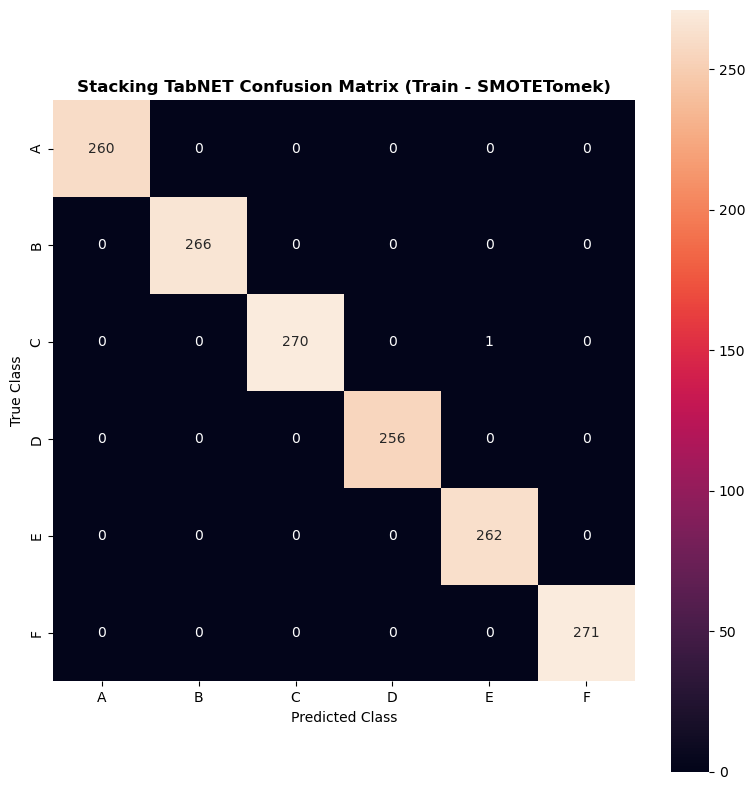

Leyenda de clases:
A: Healthy
B: Iron deficiency anemia
C: Macrocytic anemia
D: Normocytic hypochromic anemia
E: Normocytic monochromatic anemia
F: Other microcytic anemia


In [292]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Letras y nombres reales
letras = ['A', 'B', 'C', 'D', 'E', 'F']
nombres = [
    'Healthy',
    'Iron deficiency anemia',
    'Macrocytic anemia',
    'Normocytic hypochromic anemia',
    'Normocytic monochromatic anemia',
    'Other microcytic anemia'
]
map_dict = dict(zip(letras, nombres))

# Codificador para letras
le = LabelEncoder()
le.fit(letras)

# PREDICCIÓN CONJUNTO TRAIN
y_train_pred = meta_model.predict(meta_X_train)

# Decodificar etiquetas reales y predichas (TRAIN) a letras A–F
y_true_labels = le.inverse_transform(y_train_np)     # reales
y_pred_labels = le.inverse_transform(y_train_pred)   # predichas

# Matriz de confusión
conf_matrix = pd.crosstab(
    pd.Series(y_true_labels, name="ACTUAL"),
    pd.Series(y_pred_labels, name="PREDICCIÓN")
)

# Graficar matriz (TRAIN) sin cmap
plt.rcParams["figure.figsize"] = (8, 8)
sns.heatmap(conf_matrix, square=True, annot=True, fmt='d', cbar=True)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Stacking TabNET Confusion Matrix (Train - SMOTETomek)', fontweight='bold')
plt.tight_layout()
plt.show()

# Mostrar leyenda de clases
print("Leyenda de clases:")
for letra, nombre in map_dict.items():
    print(f"{letra}: {nombre}")


## MÉTRICAS DEL MODELO (TEST)

In [295]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score, matthews_corrcoef
from sklearn.preprocessing import LabelBinarizer

# Obtener predicciones y probabilidades del meta-modelo (TabNet)
y_pred = meta_model.predict(meta_X_test)  # Predicciones de clase
y_probs = meta_model.predict_proba(meta_X_test)  # Probabilidades para ROC AUC

# Calcular y mostrar métricas
print('=== Métricas del Meta-Modelo (TabNet) en Prueba ===')
print('El accuracy en el conjunto de prueba es:', accuracy_score(y_test_np, y_pred), '→', accuracy_score(y_test_np, y_pred)*100, '%')
print('La precisión en el conjunto de prueba es:', precision_score(y_test_np, y_pred, average='weighted'), '→', precision_score(y_test_np, y_pred, average='weighted')*100, '%')
print('La sensibilidad en el conjunto de prueba es:', recall_score(y_test_np, y_pred, average='weighted'), '→', recall_score(y_test_np, y_pred, average='weighted')*100, '%')
print('El F1-score en el conjunto de prueba es:', f1_score(y_test_np, y_pred, average='weighted'), '→', f1_score(y_test_np, y_pred, average='weighted')*100, '%')

# Calcular ROC AUC (binario o multiclase)
if len(np.unique(y_test_np)) == 2:
    roc_auc = roc_auc_score(y_test_np, y_probs[:, 1])  # Caso binario
else:
    y_test_bin = LabelBinarizer().fit_transform(y_test_np)
    roc_auc = roc_auc_score(y_test_bin, y_probs, multi_class='ovr')  # Caso multiclase

print('El ROC AUC en el conjunto de prueba es:', roc_auc, '→', roc_auc*100, '%')
print('Matthews Correlation Coefficient es:', matthews_corrcoef(y_test_np, y_pred))

=== Métricas del Meta-Modelo (TabNet) en Prueba ===
El accuracy en el conjunto de prueba es: 0.9956521739130435 → 99.56521739130434 %
La precisión en el conjunto de prueba es: 0.9957223001402524 → 99.57223001402524 %
La sensibilidad en el conjunto de prueba es: 0.9956521739130435 → 99.56521739130434 %
El F1-score en el conjunto de prueba es: 0.9955554315268552 → 99.55554315268552 %
El ROC AUC en el conjunto de prueba es: 0.9995454545454545 → 99.95454545454545 %
Matthews Correlation Coefficient es: 0.9943551388873975


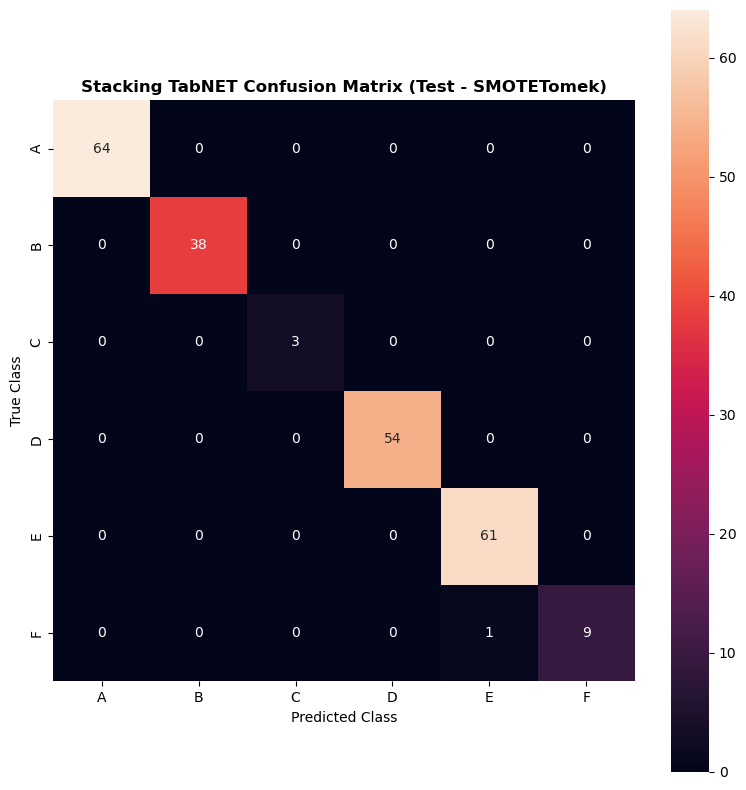

Leyenda de clases:
A: Healthy
B: Iron deficiency anemia
C: Macrocytic anemia
D: Normocytic hypochromic anemia
E: Normocytic monochromatic anemia
F: Other microcytic anemia


In [297]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Letras y nombres
letras = ['A', 'B', 'C', 'D', 'E', 'F']
nombres = [
    'Healthy',
    'Iron deficiency anemia',
    'Macrocytic anemia',
    'Normocytic hypochromic anemia',
    'Normocytic monochromatic anemia',
    'Other microcytic anemia'
]
map_dict = dict(zip(letras, nombres))

# Ajustar LabelEncoder con letras
le = LabelEncoder()
le.fit(letras)

# Decodificar predicciones y etiquetas verdaderas a letras
y_true_labels = le.inverse_transform(y_test_np)  # A, B, C, ...
y_pred_labels = le.inverse_transform(y_pred)     # A, B, C, ...

# Crear matriz de confusión con letras
conf_matrix = pd.crosstab(pd.Series(y_true_labels, name="ACTUAL"),
                          pd.Series(y_pred_labels, name="PREDICCIÓN"))

# Gráfico clásico sin cmap, con letras
plt.rcParams["figure.figsize"] = (8, 8)
sns.heatmap(conf_matrix, square=True, annot=True, fmt='d', cbar=True)  # sin cmap
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Stacking TabNET Confusion Matrix (Test - SMOTETomek)', fontweight='bold')
plt.tight_layout()
plt.show()

# Mostrar la leyenda de letras
print("Leyenda de clases:")
for letra, nombre in map_dict.items():
    print(f"{letra}: {nombre}")


## ROC CURVE (TRAIN)

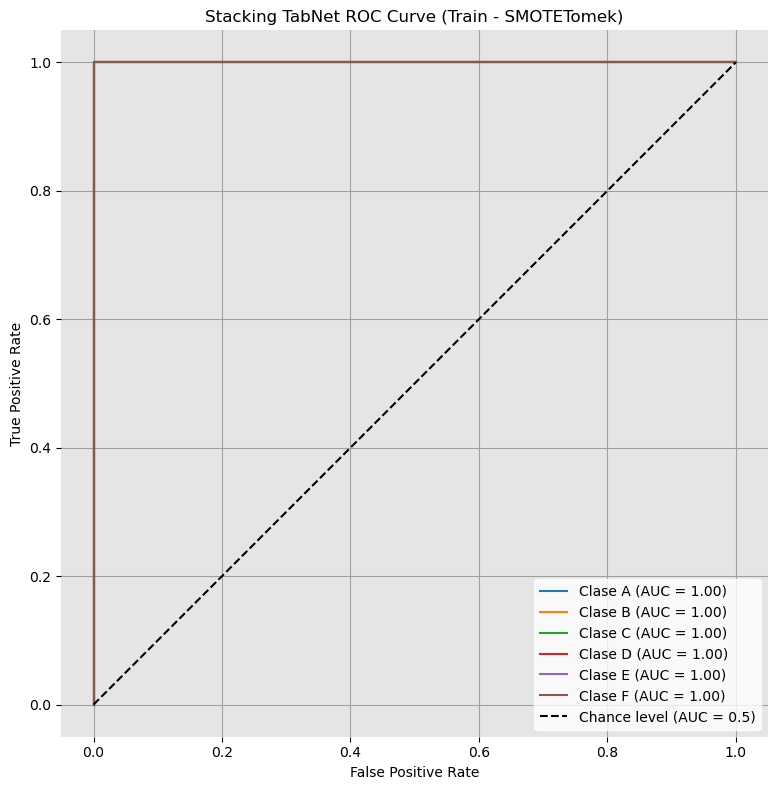

In [299]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

# Obtener probabilidades predichas por TabNet para entrenamiento
probs_train = meta_model.predict_proba(meta_X_train)

# Binarizar las etiquetas verdaderas
lb = LabelBinarizer()
y_train_bin = lb.fit_transform(y_train_np)

# Crear figura con estilo uniforme
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_facecolor('#e5e5e5')  # Fondo gris claro

# Quitar bordes del gráfico
for spine in ax.spines.values():
    spine.set_visible(False)

# Curvas ROC por clase
for i in range(y_train_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_train_bin[:, i], probs_train[:, i])
    roc_auc = auc(fpr, tpr)
    clase_decodificada = le.inverse_transform([i])[0]
    ax.plot(fpr, tpr, label=f'Clase {clase_decodificada} (AUC = {roc_auc:.2f})')

# Línea aleatoria
ax.plot([0, 1], [0, 1], "k--", label="Chance level (AUC = 0.5)")

# Estética del gráfico
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Stacking TabNet ROC Curve (Train - SMOTETomek)')

# Leyenda con fondo blanco
legend = ax.legend(loc="lower right", facecolor='#ffffff', frameon=True)
legend.get_frame().set_edgecolor('#ffffff')

# Cuadrícula gris medio
ax.grid(True, color='#a0a0a0')
ax.axis('square')

plt.tight_layout()
plt.show()


## ROC CURVE (TEST)

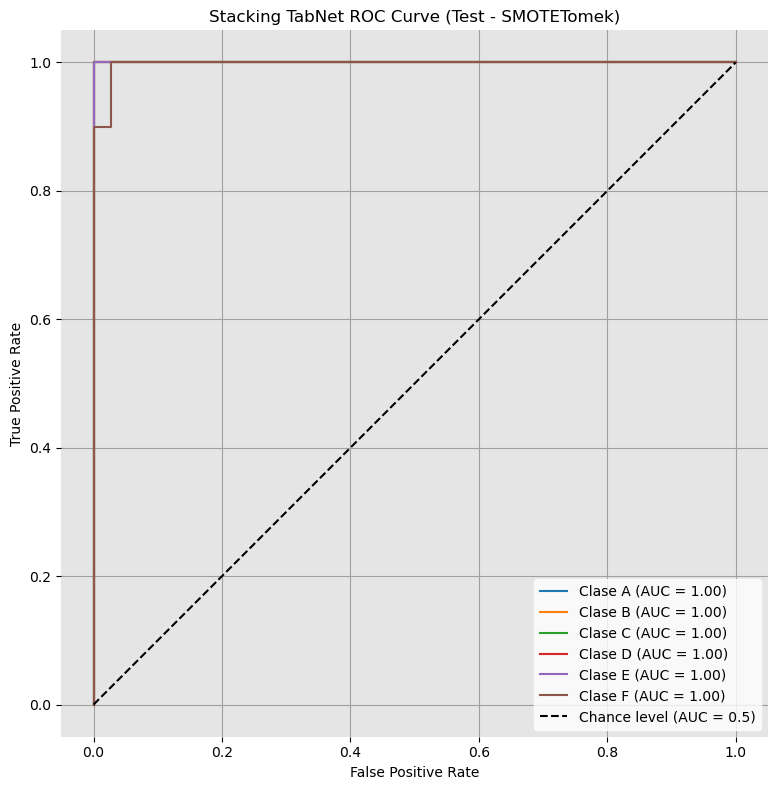

In [302]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

# Obtener probabilidades del meta-modelo (TabNet) en el conjunto de test
probs_test = meta_model.predict_proba(meta_X_test)

# Binarizar etiquetas verdaderas del test
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test_np)

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_facecolor('#e5e5e5')  # Fondo gris claro

# Quitar bordes del gráfico
for spine in ax.spines.values():
    spine.set_visible(False)

# Graficar curva ROC para cada clase
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], probs_test[:, i])
    roc_auc = auc(fpr, tpr)
    clase_decodificada = le.inverse_transform([i])[0]
    ax.plot(fpr, tpr, label=f'Clase {clase_decodificada} (AUC = {roc_auc:.2f})')

# Línea base aleatoria
ax.plot([0, 1], [0, 1], "k--", label="Chance level (AUC = 0.5)")

# Estética del gráfico
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Stacking TabNet ROC Curve (Test - SMOTETomek)')

# Leyenda con fondo blanco
legend = ax.legend(loc="lower right", facecolor='#ffffff', frameon=True)
legend.get_frame().set_edgecolor('#ffffff')

# Cuadrícula gris medio
ax.grid(True, color='#a0a0a0')
ax.axis('square')

plt.tight_layout()
plt.show()


## PRECISION RECALL CURVE (TRAIN)

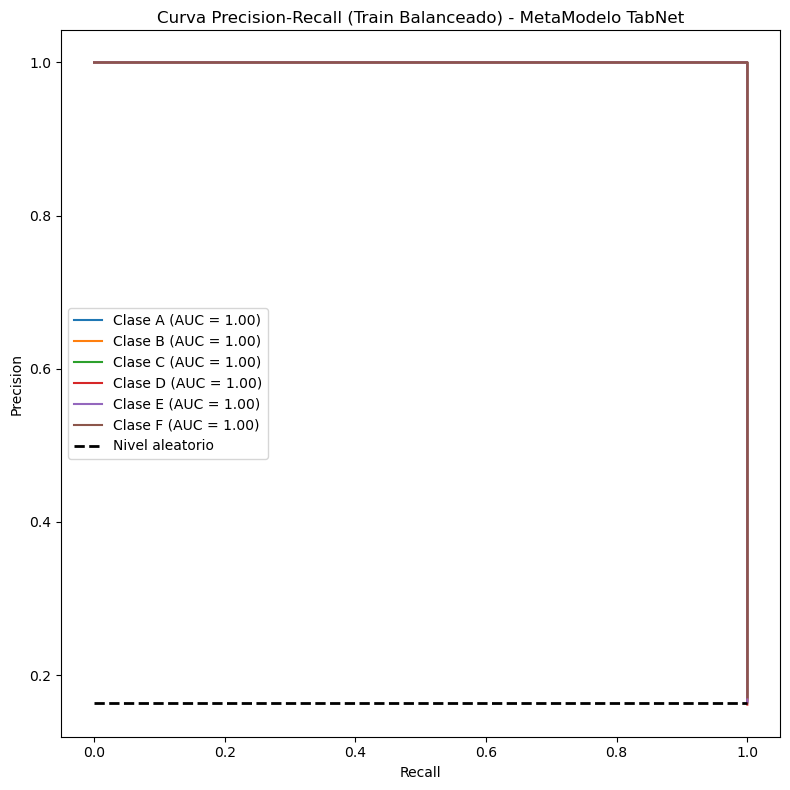

In [304]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer

# Binarizar las etiquetas verdaderas
lb = LabelBinarizer()
y_train_bin = lb.fit_transform(y_train_np)

# Obtener probabilidades del meta-modelo sobre los datos de entrenamiento
probs_train = meta_model.predict_proba(meta_X_train)

# Crear figura
plt.figure(figsize=(8, 8))

# Curva precision-recall para cada clase
for i in range(y_train_bin.shape[1]):
    precision, recall, _ = precision_recall_curve(y_train_bin[:, i], probs_train[:, i])
    pr_auc = auc(recall, precision)
    clase_decodificada = le.inverse_transform([i])[0]
    plt.plot(recall, precision, label=f'Clase {clase_decodificada} (AUC = {pr_auc:.2f})')

# Línea base (nivel aleatorio)
no_skill = len(y_train_np[y_train_np == y_train_np[0]]) / len(y_train_np)
plt.plot([0, 1], [no_skill, no_skill], 'k--', lw=2, label="Nivel aleatorio")

# Etiquetas y estilo
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall (Train Balanceado) - MetaModelo TabNet')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


## PRECISION RECALL CURVE (TEST)

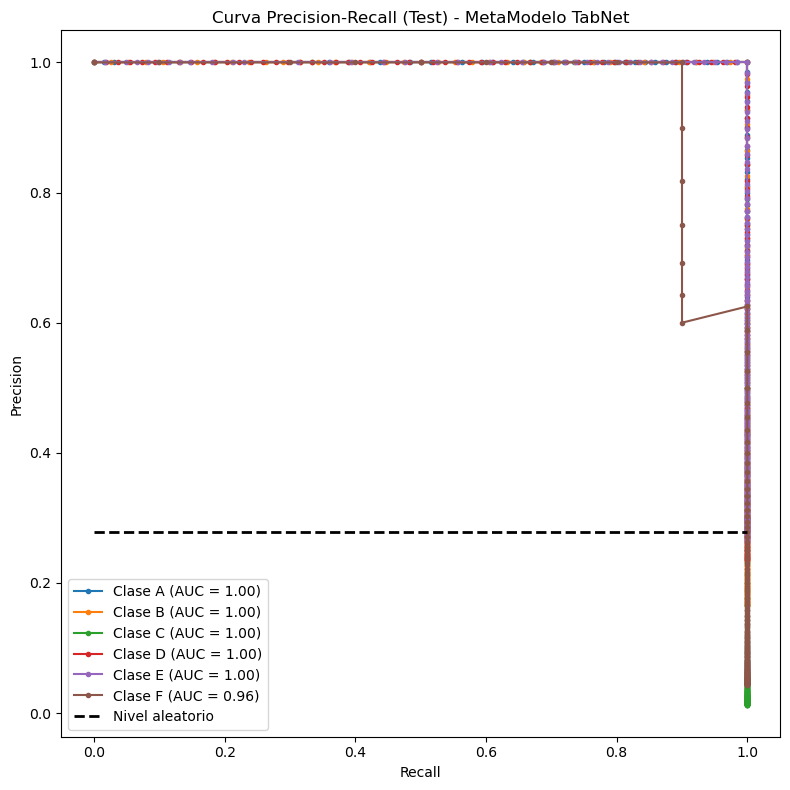

In [307]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer

# Binarizar etiquetas verdaderas del test
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test_np)

# Obtener probabilidades del meta-modelo sobre el conjunto de test
probs_test = meta_model.predict_proba(meta_X_test)

# Crear figura
plt.figure(figsize=(8, 8))

# Graficar la curva Precision-Recall para cada clase
for i in range(y_test_bin.shape[1]):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], probs_test[:, i])
    pr_auc = auc(recall, precision)
    clase_decodificada = le.inverse_transform([i])[0]
    plt.plot(recall, precision, marker='.', label=f'Clase {clase_decodificada} (AUC = {pr_auc:.2f})')

# Línea base (nivel aleatorio)
no_skill = len(y_test_np[y_test_np == y_test_np[0]]) / len(y_test_np)
plt.plot([0, 1], [no_skill, no_skill], 'k--', lw=2, label="Nivel aleatorio")

# Etiquetas y estilo
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall (Test) - MetaModelo TabNet')
plt.legend(loc='best')
plt.tight_layout()
plt.show()
